In [1]:
import logging

import mkidgen3

import matplotlib.pyplot as plt

from mkidgen3.mkid_setup import sweeps
from mkidgen3.server.captures import CaptureJob, CaptureRequest, FRSClient
from mkidgen3.server.waveform import WaveformFactory
from mkidgen3.server.feedline_config import *

/Users/aled/.local/share/micromamba/envs/work-pynq/lib/python3.12/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


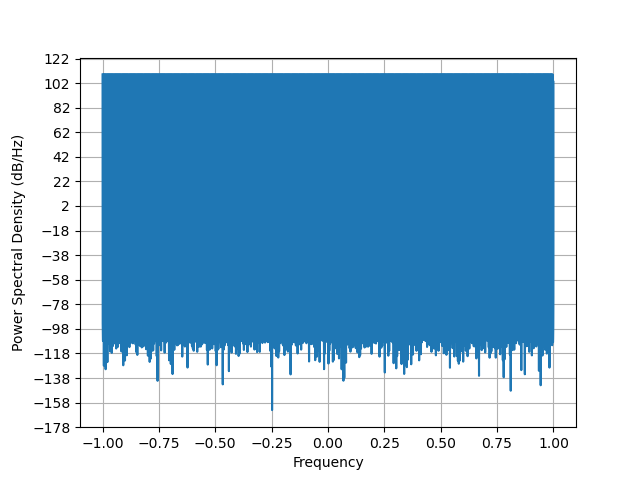

In [2]:
%matplotlib widget
waveform = WaveformConfig(waveform = WaveformFactory(n_uniform_tones = 512))

plt.psd(waveform.waveform.output_waveform, NFFT = 1<<19)
None

In [3]:
frsb = FRSClient(url='rfsoc4x2b.physics.ucsb.edu', command_port=8888, data_port=8889, status_port=8890)

bitstream = BitstreamConfig(bitstream='/home/xilinx/gen3_top_final.bit', ignore_version=True)
rfdc_clk = RFDCClockingConfig(programming_key='4.096GSPS_MTS_dualloop', clock_source=None)  # clock source should default to external 10 MHz
rfdc = RFDCConfig(dac_mts=True, adc_mts=False, adc_gains=None, dac_gains=None)
if_board = IFConfig(lo=6000, adc_attn=50, dac_attn=50)
chan = waveform.default_channel_config
ddc = waveform.default_ddc_config
filtercfg=FilterConfig(coefficients=f'unity{2048}')
trigconfig = TriggerConfig()

fc = FeedlineConfig(
    bitstream=bitstream,
    rfdc_clk=rfdc_clk,
    rfdc=rfdc,
    if_board=if_board,
    waveform=waveform,
    chan=chan,
    ddc=ddc,
    filter=filtercfg,
    trig=trigconfig
)

In [4]:
psweep_config = sweeps.PowerSweepConfig.from_matched(
    60,
    30,
    1,
    10,
    sweeps.CombSweepConfig.from_comb(
        128,
        8,
        waveform,
        average = 1024
    )
)

psweep_config.attens

{60: 30,
 61: 29,
 62: 28,
 63: 27,
 64: 26,
 65: 25,
 66: 24,
 67: 23,
 68: 22,
 69: 21}

In [5]:
logging.basicConfig(level=logging.DEBUG)

psweep = psweep_config.run_powersweep_frs(frsb, fc)

ATTN:   0%|          | 0/10 [00:00<?, ?it/s]

FREQ:   0%|          | 0/136 [00:00<?, ?it/s]

DEBUG:mkidgen3.server.captures:Listening for status updates to b'2271697343434912949'
DEBUG:mkidgen3.server.captures:Listening for data for b'2271697343434912949'
DEBUG:mkidgen3.server.captures:Status update for b'2271697343434912949': running:Started at UTC 2024-02-24 04:08:11.740096
DEBUG:mkidgen3.server.captures:Status update for b'2271697343434912949': established:
DEBUG:mkidgen3.server.captures:Status update for b'2271697343434912949': capturing:1/1
DEBUG:mkidgen3.server.captures:Received 8.0 MiB of 8.0 MiB for <IQCaptureSink(cap_id=b'2271697343434912949', started daemon 11559530496)>
DEBUG:mkidgen3.server.captures:Received null, capture data stream over
DEBUG:mkidgen3.server.captures:Status update for b'2271697343434912949': finished:Finished at UTC 2024-02-24 04:08:12.369868
INFO:mkidgen3.server.captures:Capture data for b'2271697343434912949' processed into (1024, 2048) complex128: <mkidgen3.server.captures.IQCaptureData object at 0x11bf32270>
DEBUG:mkidgen3.server.captures:Lis

KeyboardInterrupt: 